In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import preprocessing

df = pd.read_csv("master.csv")

In [3]:
del df['age']
del df['suicides_no']
del df['country-year']
del df['HDI for year']
del df['generation']
del df['population']
del df['sex']
del df['country']
del df['gdp_per_capita ($)']
del df[' gdp_for_year ($) ']

In [4]:
df['year'] = pd.factorize(df['year'])[0] + 1

In [5]:
df.info()
df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               27820 non-null  int64  
 1   suicides/100k pop  27820 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 434.8 KB


,year,suicides/100k pop
year,1.000000,-0.051249
suicides/100k pop,-0.051249,1.000000


<AxesSubplot:xlabel='year', ylabel='suicides/100k pop'>

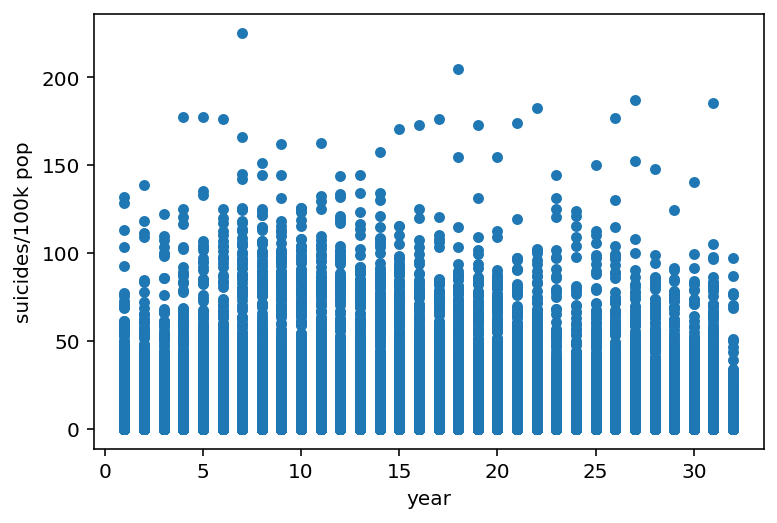

In [6]:
df.plot(kind='scatter',x='year',y='suicides/100k pop')

In [7]:
Y = df.iloc[:, -1:].values
X = df.iloc[:, 0].values

X = X.reshape(-1,1)
Y = Y.reshape(-1)

print(X)
print(Y)

[[ 1]
 [ 1]
 [ 1]
 ...
 [29]
 [29]
 [29]]
[6.71 5.19 4.83 ... 2.17 1.67 1.46]


In [8]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

# Fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

model=regressor.fit(X_Train, y_Train) # FITTING MEANS TRAINING

# Predicting the Test set result ￼

Y_Pred = model.predict(X_Test)

In [9]:
print(model.coef_)
print(model.intercept_)

[-0.11667112]
14.89115712424852


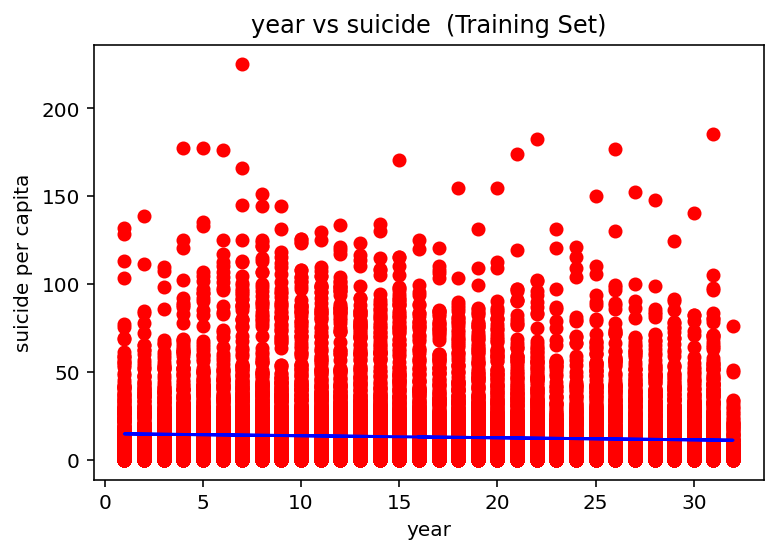

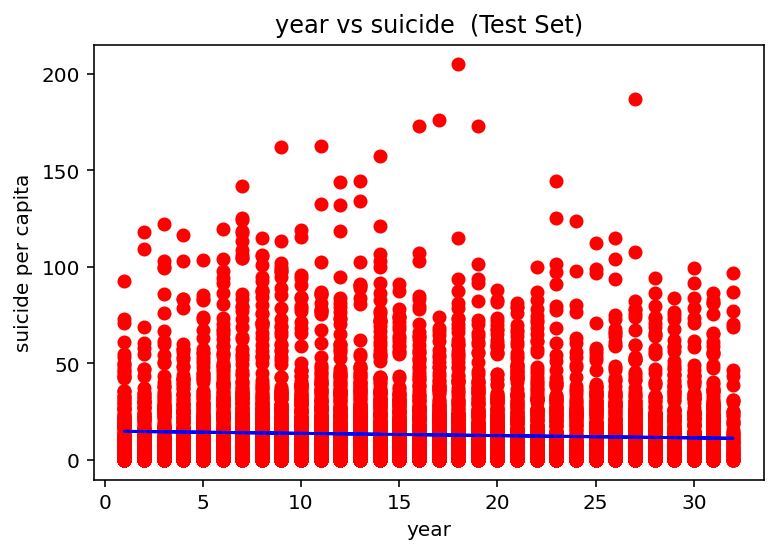

In [10]:
# Visualising the Training set results

plt.scatter(X_Train, y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('year vs suicide  (Training Set)')
plt.xlabel('year')
plt.ylabel('suicide per capita')
plt.show()

# Visualising the Test set results

plt.scatter(X_Test, y_Test, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('year vs suicide  (Test Set)')
plt.xlabel('year')
plt.ylabel('suicide per capita')
plt.show()

In [11]:
model.score(X, Y)

0.0025561608745051645

In [12]:
df.describe()

,year,suicides/100k pop
count,27820.000000,27820.000000
mean,16.447879,12.816097
std,8.588896,18.961511
min,1.000000,0.000000
25%,9.000000,0.920000
50%,16.000000,5.990000
75%,23.000000,16.620000
max,32.000000,224.970000


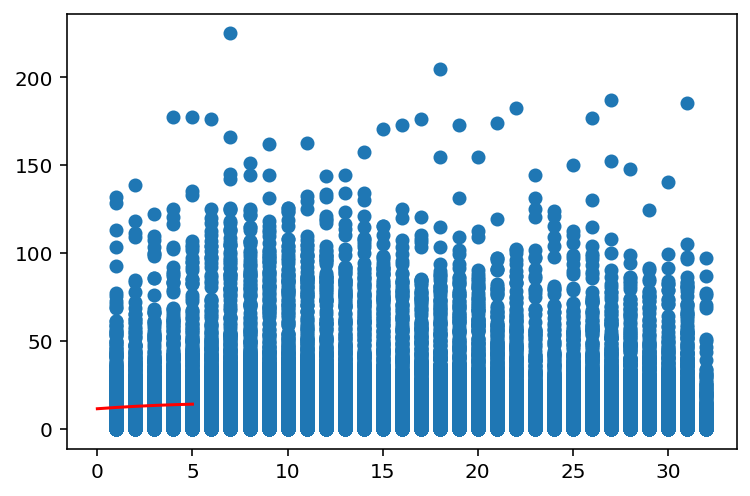

In [14]:
import numpy

x = df['year']
y = df['suicides/100k pop']

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(0,5,225)

plt.scatter(x,y)
plt.plot(myline, mymodel(myline), color='red')
plt.show()


In [15]:
from sklearn.metrics import r2_score
print(r2_score(y, mymodel(x)))

0.004063420762907
